In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time as tm

In [9]:
def MCRNG(seed, A, C, M):
    
    x = seed
    numbers = []
    
    while True:
        x = ( A*seed + C )%M
        
        if (x in numbers):
            break
        else:
            numbers.append(x)
            seed = x
        
    return numbers
        

In [18]:
seed = 10
A = 36+1
c = 3
M = int(2**11)

start = tm.time()
x1 = np.array(MCRNG(seed, A, c, M))
print(tm.time()-start)

0.03352689743041992


In [20]:
print(len(x1))
print(M)

2048
2048


[ 373 1516  799 ...  344  443   10]


Text(0, 0.5, '$x_i / M$')

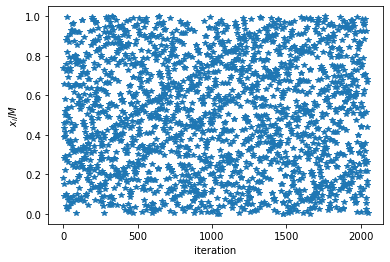

In [23]:
print(x1)

plt.figure()
plt.plot(x1/M, '*')
plt.xlabel('iteration')
plt.ylabel(r'$x_i / M$')

Text(0, 0.5, '$x_{i+1}$')

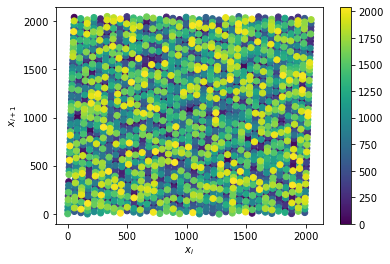

In [24]:
plt.figure()
plt.scatter(x1[:-1], x1[1:], c=np.arange(len(x1[1:])))
plt.colorbar()
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')

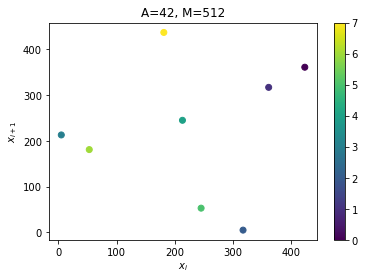

A=42, M=512, Length of sequence: 9


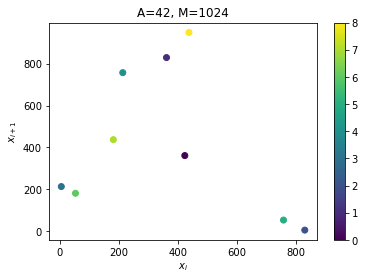

A=42, M=1024, Length of sequence: 10


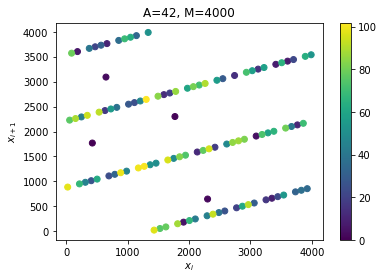

A=42, M=4000, Length of sequence: 104


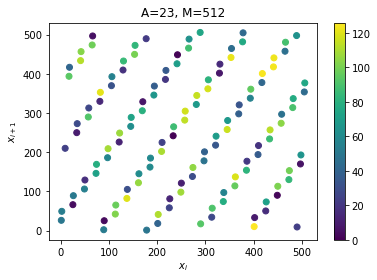

A=23, M=512, Length of sequence: 128


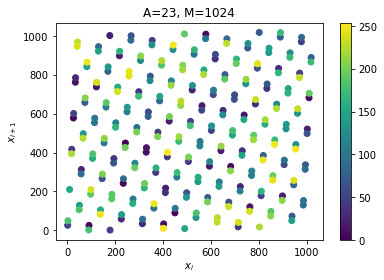

A=23, M=1024, Length of sequence: 256


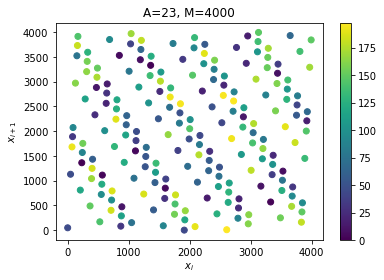

A=23, M=4000, Length of sequence: 200


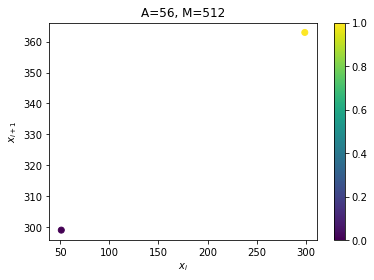

A=56, M=512, Length of sequence: 3


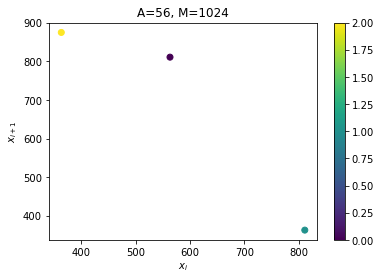

A=56, M=1024, Length of sequence: 4


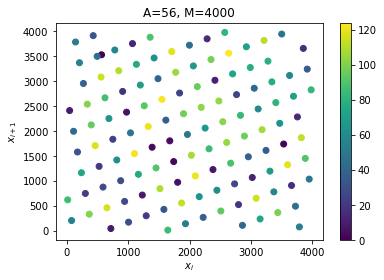

A=56, M=4000, Length of sequence: 126


In [32]:
# Homework
# modify M and A, and check the impact on the correlation structure
# Do you find any trends?

seeds = 10
A_values = [42,23, 56]
M_values = [ 512, 1024,4000]  

for A in A_values:
    for M in M_values:
        
        x1 = np.array(MCRNG(seeds, A, 3, M))
        
 
        plt.figure()
        plt.scatter(x1[:-1], x1[1:], c=np.arange(len(x1[1:])))
        plt.colorbar()
        plt.xlabel(r'$x_i$')
        plt.ylabel(r'$x_{i+1}$')
        plt.title(f'A={A}, M={M}')
        plt.show()
        print(f'A={A}, M={M}, Length of sequence: {len(x1)}')

#If M is too small, the range of possible numbers is reduced, leading to quicker repetition of the sequence, 
#and the scatter plot may show visible patterns.

#If A is poorly chosen, particularly if it's not relatively prime to M, the sequence might show strong correlations
#between consecutive numbers, leading to visible patterns in the scatter plot.

#Better values of A and larger M (especially when A and M are chosen carefully) should result in a more 
#random scatter plot with no visible correlation.


0.0011339187622070312


Text(0, 0.5, '$x_{i+1}$')

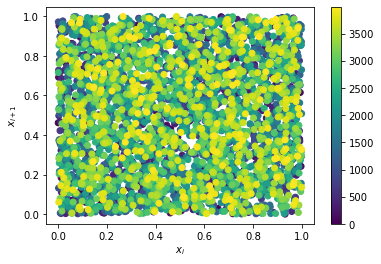

In [33]:
# lets see how we perform against python
rng = np.random.default_rng()

start = tm.time()
x_np = rng.uniform(size=M)
print(tm.time()-start)

plt.figure()
plt.scatter(x_np[:-1], x_np[1:], c=np.arange(len(x_np[1:])))
plt.colorbar()
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')

In [51]:
# we can reduce the correlation by shuffeling the pseudo random numbers

start = tm.time()
x2 = MCRNG(seed, A, c, M)
print(tm.time()-start)

print(f"Length of x1: {len(x1)}")
print(f"Length of x2: {len(x2)}")
print(f"Max index in x2: {max(x2)}")

x_shuffle = x1[x2]


print(x2[0])
print(x1[x2[0]], x_shuffle[0])



plt.figure()
plt.scatter(x_shuffle[:-1], x_shuffle[1:], c=np.arange(len(x_shuffle[1:])))
plt.colorbar()
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')

0.0003211498260498047
Length of x1: 125
Length of x2: 126
Max index in x2: 3979


IndexError: index 563 is out of bounds for axis 0 with size 125

In [ ]:
# uniform distribution



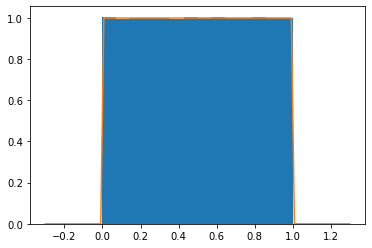

In [52]:
# the build-in generator also has a much less correlation among points

unif = rng.uniform(size=1000000)

_ = plt.hist(unif, density=True, bins=np.linspace(0,1, num=15))

xx = np.linspace(-0.3, 1.3, num=100)
pdf = np.where( (xx>=0) & (xx<1), 1, 0)

plt.plot(xx, pdf)




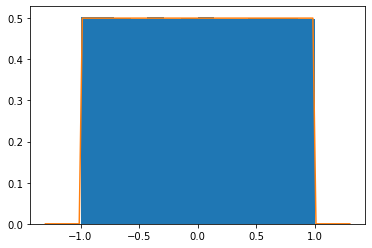

In [53]:
a = -1
b = 1


unif = rng.uniform(a, b, size=1000000)

_ = plt.hist(unif, density=True, bins=np.linspace(a, b, num=15))

xx = np.linspace(a-0.3, b+.3, num=100)
pdf = np.where( (xx>=a) & (xx<b), 1/(b-a), 0)

plt.plot(xx, pdf)


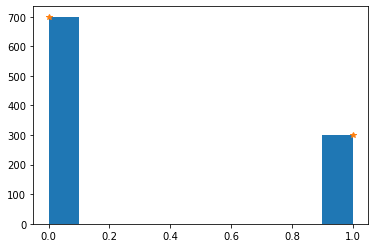

In [61]:
# bernoulli

pi = 0.3

unif = rng.uniform(size=1000)
bern1 = np.where(unif<pi, 1, 0)

plt.hist(bern1)

k = np.array([0, 1])

pmf = pi**k * (1-pi)**(1-k)

plt.plot(k, pmf*len(bern1), '*')


0.9999999997671694


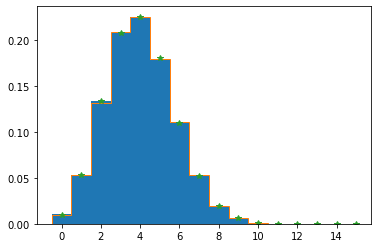

In [73]:
# consider a multiple choice test with N=15 questions with four answers
# each, of which only one is correct. 
# How many correct answers will you get,
# if you randomly choose answers (p=1/4)

from scipy.special import comb 
# https://stackoverflow.com/questions/26560726/python-binomial-coefficient

N = 16
p = 0.25

def TakeTheTest(N, p):
    
    answer = rng.uniform(size=N)
    
    success = np.where(answer<p, 1, 0)
    
    return np.sum(success) 
    
num = 204800

ks = np.array([TakeTheTest(N, p) for i in range(num)])
ks2 = rng.binomial(N, p, size=num)


ints = np.arange(16)
plt.hist(ks, bins=ints-0.5, density=True)
plt.hist(ks2, bins=ints-0.5, density=True, histtype='step')

prob = comb(N, ints) * p**ints * (1-p)**(N-ints)

plt.plot(ints, prob, '*')

# Homwework (analytical): check for normalisation

print (np.sum(prob))

In [74]:


def Fails(p):
    count = 0
    
    while rng.uniform()>p:
        count += 1
        
    return count
    

0.9999734386011127


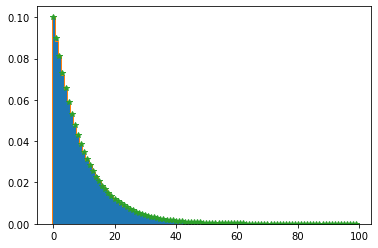

In [76]:
p = 0.1

ints = np.arange(100)

k_geo = np.array([Fails(p) for i in range(num)])
k_geo2 = rng.geometric(p, size=num)-1  # python defines it as numbers of trials to run until success,
# while we consider number of failures before success, which is one less

plt.hist(k_geo, bins=ints-0.5, density=True)
plt.hist(k_geo2, bins=ints-0.5, density=True, histtype='step')

prob = p * (1-p)**ints

plt.plot(ints, prob, '*')

# Homwework (analytical): check for normalisation

print (np.sum(prob))

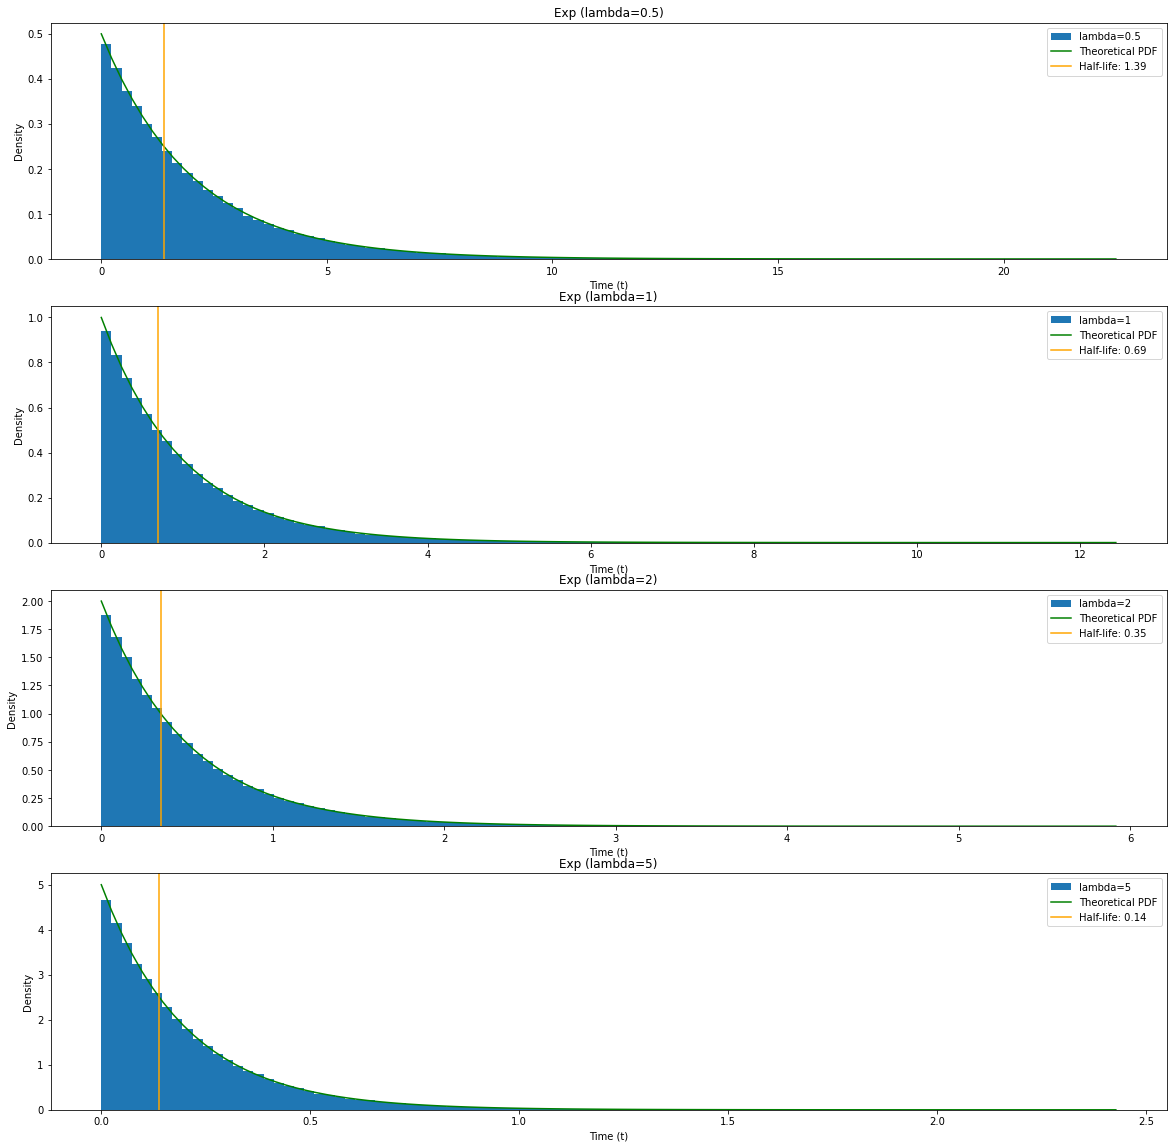

In [107]:
# exponential distribution: the continuous version of the geometrical distribution


# Homerwork: draw from this distribution for different lambdas. 
# make histograms, and compare to the pdf.
# visualize and study the impact of varying the parameter lambda

# Follow the lecture notes, derive the halflive time of the process 
# and overplot it


lambdas = [0.5, 1, 2, 5]

plt.figure(figsize=(20, 20))

for i, lam in enumerate(lambdas):
    t = rng.exponential(scale=1/lam, size=num)
    
    plt.subplot(4, 1,i+1)
    plt.hist(t, bins=100, density=True, label=f"lambda={lam}")
    
    x = np.linspace(0, np.max(t), 100)
    pdf = lam * np.exp(-lam * x)
    
    plt.plot(x, pdf, 'g-', label="Theoretical PDF")
    
    half_life = np.log(2) / lam
    plt.axvline(half_life, color='orange', linestyle='-', label=f"Half-life: {half_life:.2f}")
    
    plt.title(f"Exp (lambda={lam})")
    plt.xlabel("Time (t)")
    plt.ylabel("Density")
    plt.legend()

plt.show()
